In [24]:
import pandas as pd
import numpy as np

data = pd.read_csv('signo.csv')

In [17]:
print(data.head())


     Marca temporal Proporciona tu fecha de nacimiento Signo Zodiacal  \
0  27/07/2024 14:38                         18/11/2002      Escorpion   
1  27/07/2024 14:42                         12/03/2003         piscis   
2  27/07/2024 14:56                         21/09/1999          libra   
3  27/07/2024 15:09                         25/05/2002        geminis   
4  27/07/2024 15:12                         01/11/2001      Escorpion   

  ¿Te gusta comer en restaurantes?  ¿Te gusta salir de picnic (día de campo)?  \
0                         Frecuente                             Muy Frecuente   
1                         Frecuente                             Muy Frecuente   
2                    Poco Frecuente                                 Frecuente   
3                    Poco Frecuente                            Poco Frecuente   
4                         Frecuente                            Poco Frecuente   

  ¿Te gustan los abrazos? ¿Te gusta dar regalos? ¿Te gusta recibir regalos

In [18]:
primera_columna = data['Proporciona tu fecha de nacimiento']
#primera_columna = data.iloc[:, 1]


In [19]:
columna_signos = data['Signo Zodiacal']

In [20]:
primera_columna = pd.to_datetime(primera_columna, errors='coerce')
print(primera_columna.head())

# Extraer el mes
meses = primera_columna.dt.month
print(meses.head())


0   2002-11-18
1   2003-03-12
2   1999-09-21
3   2002-05-25
4   2001-11-01
Name: Proporciona tu fecha de nacimiento, dtype: datetime64[ns]
0    11.0
1     3.0
2     9.0
3     5.0
4    11.0
Name: Proporciona tu fecha de nacimiento, dtype: float64


C:\Users\floi_\AppData\Local\Temp\ipykernel_20524\1676331749.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  primera_columna = pd.to_datetime(primera_columna, errors='coerce')


In [21]:
# Extraer el día del mes
dias = primera_columna.dt.day
print(dias.head())


0    18.0
1    12.0
2    21.0
3    25.0
4     1.0
Name: Proporciona tu fecha de nacimiento, dtype: float64


In [22]:
print(columna_signos.head())

0    Escorpion
1       piscis
2        libra
3      geminis
4    Escorpion
Name: Signo Zodiacal, dtype: object


In [23]:
array_dias = dias.to_numpy()
array_meses = meses.to_numpy()
array_signos = columna_signos

print("meses ",array_meses.shape)
print("dias ",array_dias.shape)

meses  (100,)
dias  (100,)


In [25]:
X_train = np.column_stack((array_dias, array_meses))  # Características (por ejemplo, fechas de nacimiento)
y_train = label_encoder.fit_transform(array_signos)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)

Dimensiones de X_train: (100, 2)
Dimensiones de y_train: (100,)


Epoch 1/10


C:\Users\floi_\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.1789 - loss: 2.5472 - val_accuracy: 0.1500 - val_loss: 2.5647
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3000 - loss: 2.5607 - val_accuracy: 0.1500 - val_loss: 2.5643
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3117 - loss: 2.5565 - val_accuracy: 0.1500 - val_loss: 2.5639
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2727 - loss: 2.5532 - val_accuracy: 0.1500 - val_loss: 2.5637
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3078 - loss: 2.5488 - val_accuracy: 0.1500 - val_loss: 2.5635
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2805 - loss: 2.5452 - val_accuracy: 0.1500 - val_loss: 2.5633
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2961 - loss: 2.5421 - val_accuracy: 0.1500 - val_loss: 2.5630
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3039 - loss: 2.5357 - val_accuracy: 0.1500 - val_loss: 2.5627
Epoch 9/10

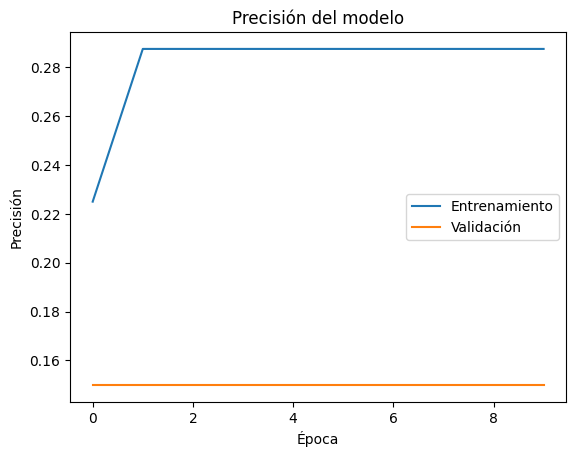

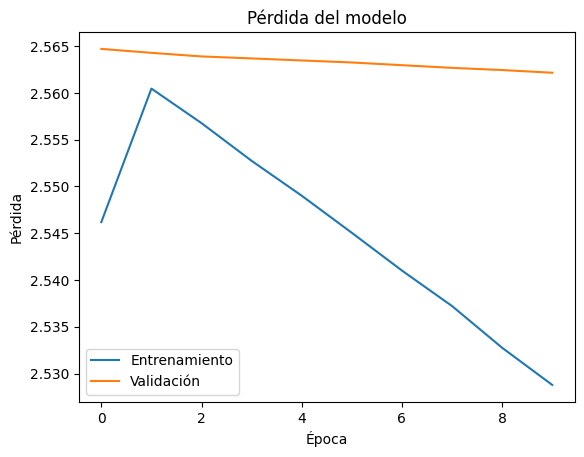

In [26]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

if len(array_dias) != len(array_meses) or len(array_dias) != len(array_signos):
    raise ValueError("array_dias, array_meses y array_signos deben tener el mismo número de elementos.")

# Datos para entrenamiento
X_train = np.column_stack((array_dias, array_meses))  # Características (por ejemplo, fechas de nacimiento)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(array_signos)  # Etiquetas (0 = Aries, 1 = Tauro, etc.)

# Verificar las dimensiones de X_train y y_train
if X_train.shape[0] != y_train.shape[0]:
    raise ValueError("El número de muestras en X_train y y_train debe ser el mismo.")

# Verificar el número de clases
num_clases = len(np.unique(y_train))

# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_clases, activation='softmax')  # Número de clases
])

#Compilación del modelo 
# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con validación
try:
    history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)
except Exception as e:
    print("Error durante el entrenamiento:", e)

# Graficar la precisión y la pérdida
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Validación'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(['Entrenamiento', 'Validación'])
plt.show()

# Guardar el modelo
modelSigno='C:/Users/floi_/Desktop/ING UTNG/GIDS4093-E/EXTRACCION BASE DATOS/UNIDAD 4/zodiaco/signo_model.keras'
model.save(modelSigno)

In [27]:
# Codigo para cargar el modelo en otro sitio
model = tf.keras.models.load_model('C:/Users/floi_/Desktop/ING UTNG/GIDS4093-E/EXTRACCION BASE DATOS/UNIDAD 4/zodiaco/signo_model.keras')


In [28]:
# Cargar el modelo
loaded_model = tf.keras.models.load_model(modelSigno)

# Nuevos datos de prueba
nuevos_dias = np.array([15, 23, 30])
nuevos_meses = np.array([7, 8, 12])

# Preparar los datos nuevos
X_nuevos = np.column_stack((nuevos_dias, nuevos_meses))

# Normalizar los datos nuevos usando el mismo scaler
X_nuevos = scaler.transform(X_nuevos)

# Realizar predicciones
predicciones = loaded_model.predict(X_nuevos)

# Convertir predicciones a etiquetas
predicciones_clases = np.argmax(predicciones, axis=1)
predicciones_etiquetas = label_encoder.inverse_transform(predicciones_clases)

# Imprimir resultados
for i, (dia, mes) in enumerate(zip(nuevos_dias, nuevos_meses)):
    print(f"Fecha: {dia}-{mes}, Signo Predicho: {predicciones_etiquetas[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Fecha: 15-7, Signo Predicho: leo
Fecha: 23-8, Signo Predicho: leo
Fecha: 30-12, Signo Predicho: leo


In [29]:
##EXPORTAR GRAFICOS A PDF

In [37]:
pip install pdf_utils


  Using cached pdf-utils-0.1.1.tar.gz (16 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached lxml-4.5.2.tar.gz (4.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\floi_\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "C:\Users\floi_\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\floi_\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\floi_\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\commands\install.py", line 379, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "C:\Users\floi_\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\resolution\resolvelib\r

In [38]:
# pdf_utils.py

from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch

def crear_pdf_con_grafico(pdf_path, imagen_path):
    c = canvas.Canvas(pdf_path, pagesize=letter)
    width, height = letter

    # Agregar el gráfico al PDF
    c.drawImage(imagen_path, 1 * inch, height - 5 * inch, width=6 * inch, height=4 * inch)
    c.drawString(1 * inch, height - 0.5 * inch, "Gráfico de Precisión y Pérdida del Modelo")
    
    c.save()

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from pdf_utils import crear_pdf_con_grafico

if len(array_dias) != len(array_meses) or len(array_dias) != len(array_signos):
    raise ValueError("array_dias, array_meses y array_signos deben tener el mismo número de elementos.")

# Datos para entrenamiento
X_train = np.column_stack((array_dias, array_meses))  # Características (por ejemplo, fechas de nacimiento)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(array_signos)  # Etiquetas (0 = Aries, 1 = Tauro, etc.)

# Verificar las dimensiones de X_train y y_train
if X_train.shape[0] != y_train.shape[0]:
    raise ValueError("El número de muestras en X_train y y_train debe ser el mismo.")

# Verificar el número de clases
num_clases = len(np.unique(y_train))

# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_clases, activation='softmax')  # Número de clases
])

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con validación
try:
    history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)
except Exception as e:
    print("Error durante el entrenamiento:", e)

# Graficar la precisión y la pérdida
plt.figure(figsize=(12, 6))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Guardar gráficos como imágenes
plt.tight_layout()
plt.savefig('precision_y_perdida.png')  # Guarda en un archivo de imagen
plt.close()

# Crear PDF con el gráfico
pdf_path = 'resultado_modelo.pdf'
crear_pdf_con_grafico(pdf_path, 'precision_y_perdida.png')

# Guardar el modelo
modelSigno='C:/Users/floi_/Desktop/ING UTNG/GIDS4093-E/EXTRACCION BASE DATOS/UNIDAD 4/zodiaco/signo_model.keras'
model.save(modelSigno)